<a href="https://colab.research.google.com/github/werent4/ML_notebooks/blob/main/digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
digits = load_digits()

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
df['target'] = digits.target

In [14]:
X = df.drop('target', axis = 'columns')
y = df.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state= 30)

In [35]:
def find_best(n):
  classifier = KNeighborsClassifier(n_neighbors= n)
  classifier.fit(X_train, y_train)
  score = classifier.score(X_test, y_test)
  print(f'Score with {n} neighbors is {score}')
  return score

In [46]:
scores = {}
for i in range (1,12):
  scores[find_best(i)] = i

Score with 1 neighbors is 0.9763560500695411
Score with 2 neighbors is 0.9659248956884562
Score with 3 neighbors is 0.9749652294853964
Score with 4 neighbors is 0.9666203059805285
Score with 5 neighbors is 0.9673157162726008
Score with 6 neighbors is 0.9568845618915159
Score with 7 neighbors is 0.954798331015299
Score with 8 neighbors is 0.9492350486787204
Score with 9 neighbors is 0.9388038942976356
Score with 10 neighbors is 0.9401947148817803
Score with 11 neighbors is 0.9360222531293463


In [71]:
keys = list(scores.keys())

In [73]:
keys.sort()

In [75]:
keys[-1]

0.9763560500695411

In [77]:
print(f'Best score is with {scores[keys[-1]]} neighbors')

Best score is with 1 neighbors


In [88]:
classifier = KNeighborsClassifier(n_neighbors= scores[keys[-1]])
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

In [89]:
c_matrix

array([[148,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 130,   0,   0,   0,   0,   1,   0,   1,   0],
       [  1,   0, 140,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,   1, 145,   0,   0,   0,   2,   0,   3],
       [  0,   1,   0,   0, 148,   0,   0,   2,   0,   1],
       [  0,   0,   0,   1,   1, 142,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 147,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 141,   0,   0],
       [  0,   8,   0,   1,   1,   0,   0,   0, 129,   1],
       [  0,   1,   0,   2,   0,   2,   0,   1,   0, 134]])

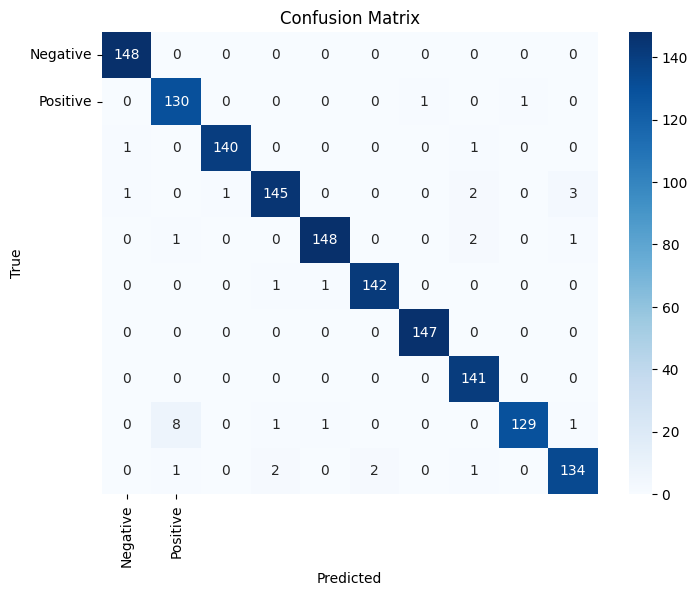

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       0.93      0.98      0.96       132
           2       0.99      0.99      0.99       142
           3       0.97      0.95      0.96       152
           4       0.99      0.97      0.98       152
           5       0.99      0.99      0.99       144
           6       0.99      1.00      1.00       147
           7       0.96      1.00      0.98       141
           8       0.99      0.92      0.96       140
           9       0.96      0.96      0.96       140

    accuracy                           0.98      1438
   macro avg       0.98      0.98      0.98      1438
weighted avg       0.98      0.98      0.98      1438

